### Practice

basic movie recommendation system based on Movie Lens Dataset.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

### Get Data

In [2]:
columns = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("u.data", sep = "\t", names = columns)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


since our datframe doesnt show movie titles, just shows item_id....
<br> _merge_ df and movie_titles over item_id

In [6]:
df = pd.merge(df,movie_titles, on = "item_id")
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


__check unique number of users and unique number of movies__

In [7]:
n_users = df.user_id.nunique()
n_items = df.item_id.nunique()

print(f"Number of users {n_users}")
print(f"Number of movies {n_items}")

Number of users 944
Number of movies 1682


### Visualizations
goal : check relationship between ratings and users

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [10]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

creating a ratings dataframe
<br> it comprises of average rating, we get this by computing the average of all ratings that all users submitted for a given movie. 

In [11]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


add column to ratings datframe which shows count of total users who rated the movie

In [12]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


#### check, how many users have rated how many movies

Text(0.5, 1.0, 'how many users have rated how many movies')

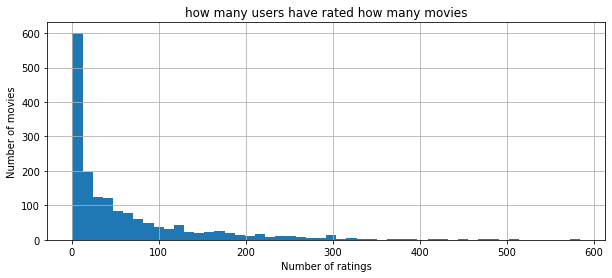

In [13]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=50)
plt.xlabel("Number of ratings")
plt.ylabel("Number of movies")
plt.title("how many users have rated how many movies")

__interpretation:__
<br> All users dont rate all movies... infact very few users will rate more than 1 movie
<br>e.g. about 200 users have rated 200 

<br> this helps us understand how popular a movie could be... if it has many ratings... many people have watched it... could be nice

#### what is the distribution of ratings like?

Text(0.5, 1.0, 'how many movies have given which rating value')

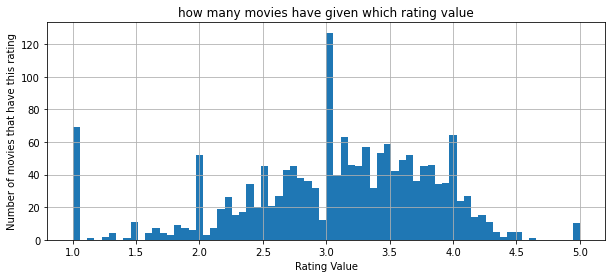

In [14]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)
plt.xlabel("Rating Value")
plt.ylabel("Number of movies that have this rating")
plt.title("how many movies have given which rating value")

__interpretation:__
we observe peaks at whole number values, disregarding these peaks, ratings submitted for movies seem to be normally ditributed.

#### Rating value against number of ratings

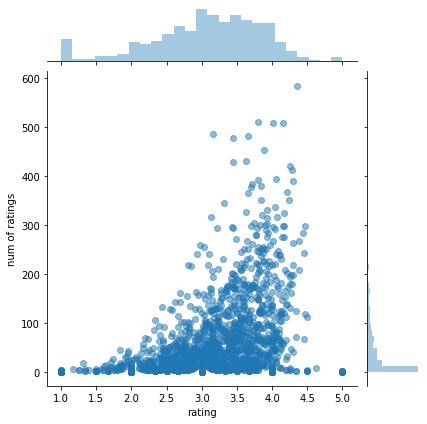

In [15]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

__interpretation:__
<br> For a higher rating value, we observe higher number of users who have given that rating...
<br> _makes sense_ , because, if a movie is good, it will be rated higha and more people will it watch it and rate it.

## Making Recommendations Part 1

__basic approach, we are trying to find movies that are similar to a given movie__

n = number of users<br>
m = number of movies<br> <br>

we want to build a n x m matrix which gives us information about ratings that users ahve submitted for movies <br>

__PIVOT TABLE TO THE RESCUE__

In [16]:
movie_user_pivot = df.pivot_table(index= "user_id", columns = "title", values = "rating")
movie_user_pivot.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we see many NaN values, this because a given user has not reviewed all 1664 movies

Lets look at most rated movies, because we will have fewer Null values here

In [17]:
ratings.sort_values("num of ratings", ascending = False).head(20)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


To find movies that are similar to a given movie, i am choosing 2 out of the top 20 rated movies (i know what genre they belong to, intutively, <br> so it'll be easier for me to gauge if the recommendations are similar to the movies i picked:
1. Star Wars
2. Silence of the Lamb

In [18]:
starwars_user_ratings = movie_user_pivot['Star Wars (1977)']
silenceofthelambs_user_ratings = movie_user_pivot['Silence of the Lambs, The (1991)']

In [19]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [20]:
silenceofthelambs_user_ratings.head()

user_id
0    NaN
1    4.0
2    NaN
3    NaN
4    NaN
Name: Silence of the Lambs, The (1991), dtype: float64

we now compute the correlation between starwars and our pivot table dataframe.
<br> __WHY??__
<br>
since our pivot table has a lot of null values, we try to find the correlation between the user ratings of our most rated movie and the user ratings all other the movies

<br> <br>
strong correlation could mean that the movies are similar to one another, <br>
__because they show similar user engagement__

In [21]:
similar_to_starwars = movie_user_pivot.corrwith(starwars_user_ratings)
similar_to_silenceofthelambs = movie_user_pivot.corrwith(silenceofthelambs_user_ratings)

c:\users\rajan\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\rajan\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


### working on starwars based recommendations...

In [22]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

we see that there are null values here, _getting rid of those_

In [23]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


sort this dataframe to see top correlated movies

In [24]:
corr_starwars.sort_values('Correlation',ascending=False).head(20)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


most of these recommendations dont seem to be making any sense <br>
this could be because users who have watched star wars have also watched these movies...

<br>
to deal with this <br>

__FILTERING NEEDS TO BE DONE__

in the next part, we filter the movies based on the number of ratings submitted <br>(number of users whove submitted ratings)
<br> <br>
that is pick only those movies which have atleast 'min_val' ratings.

__choosing 'min_val', i.e., threshold__
<br>
Based on our histogram for the number of ratings submitted, we see that the number of movies which have atleast 100 ratings is considerably less.
<br>
therefore, <br>
threshold = 100

<br> <br>

add column 'number of ratings' to the starwars correlation dataframe, in order to filter based on it

In [25]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [26]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


__interpretation:__

starwars has highest correlation with itself, obviously. <br>
these new recommendations make sense now... <br>
most are movies from starwars universe

### working on Silence of the Lamb based recommendations...

In [27]:
similar_to_silenceofthelambs

title
'Til There Was You (1997)                0.000000
1-900 (1994)                            -0.188982
101 Dalmatians (1996)                    0.030939
12 Angry Men (1957)                      0.127202
187 (1997)                               0.694740
                                           ...   
Young Guns II (1990)                     0.469233
Young Poisoner's Handbook, The (1995)    0.298745
Zeus and Roxanne (1997)                 -1.000000
unknown                                  0.440995
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

__Cleaning : remove NULL values__

In [28]:
corr_silenceofthelambs = pd.DataFrame(similar_to_silenceofthelambs,columns=['Correlation'])
corr_silenceofthelambs.dropna(inplace=True)
corr_silenceofthelambs.head()

,Correlation
title,
'Til There Was You (1997),0.000000
1-900 (1994),-0.188982
101 Dalmatians (1996),0.030939
12 Angry Men (1957),0.127202
187 (1997),0.694740


In [29]:
corr_silenceofthelambs.sort_values('Correlation',ascending=False).head(20)

,Correlation
title,
Mrs. Dalloway (1997),1.0
Spirits of the Dead (Tre passi nel delirio) (1968),1.0
Year of the Horse (1997),1.0
"Cement Garden, The (1993)",1.0
"Journey of August King, The (1995)",1.0
"Jerky Boys, The (1994)",1.0
"Silence of the Lambs, The (1991)",1.0
Infinity (1996),1.0
"Smile Like Yours, A (1997)",1.0


lets filter

BUT FIRST, lets add the number of ratings column here

In [30]:
corr_silenceofthelambs = corr_silenceofthelambs.join(ratings['num of ratings'])
corr_silenceofthelambs.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.000000,9
1-900 (1994),-0.188982,5
101 Dalmatians (1996),0.030939,109
12 Angry Men (1957),0.127202,125
187 (1997),0.694740,41


Now, FILTER

In [31]:
corr_silenceofthelambs[corr_silenceofthelambs['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
"Silence of the Lambs, The (1991)",1.000000,390
Alien: Resurrection (1997),0.408675,124
Basic Instinct (1992),0.403709,101
"Crying Game, The (1992)",0.370926,119
Shine (1996),0.368361,129


Not quite sure how HORRIFIC these recommendations are but we can sure see that the correlation values arent that great.
<br>

### Learning Point 

If we have more number of ratings submitted by users for movies, recommendations are better

<br>
<br>
<br>
<br>

## Making Recommendations Part 2

__Memory based collaborative filtering technique__
<br>
__uses COSINE SIMILARITY__

<br>
reference : https://www.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/

For this technique, to validate our results, we use a Training Testing Split on our original dataframe

In [32]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [33]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25)

We can have two types of Collaborative Filterings here:
1. Item - Item (users who like this item also liked another item)
2. User - Item (users who are similar to you liked another item)

A distance metric commonly used in recommender systems is *cosine similarity*, where the ratings are seen as vectors in ``n``-dimensional space and the similarity is calculated based on the angle between these vectors. 
Cosine similiarity for users *a* and *m* can be calculated using the formula below, where you take dot product of  the user vector *$u_k$* and the user vector *$u_a$* and divide it by multiplication of the Euclidean lengths of the vectors.

#### Step 1
create user - item matrix
<br> since we have training and tetsing data separate, we will have two user-item matrices

We can easily map user/item ID’s to user/item indices by removing the “Python starts at 0” offset between them.

In [34]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

#### Step 2
use pairwise distances function to compute Cosine Similarity

In [35]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

In [42]:
user_similarity

array([[0.        , 0.90858299, 0.94838464, ..., 0.84523131, 0.67335484,
        0.928065  ],
       [0.90858299, 0.        , 0.8805    , ..., 0.85900176, 0.90639644,
        1.        ],
       [0.94838464, 0.8805    , 0.        , ..., 0.95155829, 0.97921056,
        1.        ],
       ...,
       [0.84523131, 0.85900176, 0.95155829, ..., 0.        , 0.8593783 ,
        1.        ],
       [0.67335484, 0.90639644, 0.97921056, ..., 0.8593783 , 0.        ,
        1.        ],
       [0.928065  , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

In [43]:
item_similarity

array([[0.        , 0.72300598, 0.74176758, ..., 1.        , 1.        ,
        1.        ],
       [0.72300598, 0.        , 0.76440286, ..., 1.        , 0.90737387,
        0.90737387],
       [0.74176758, 0.76440286, 0.        , ..., 1.        , 1.        ,
        0.8795171 ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.90737387, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.90737387, 0.8795171 , ..., 1.        , 1.        ,
        0.        ]])

With the similarity, we can now predict the ratings that were not included with the data. Using these predictions, we can then compare them with the test data to attempt to validate the quality of our recommender model

In [45]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [46]:
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [47]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')

Since we cant see if our recommendations are wrong or right <br>
to check accuracy, we use RMSE

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

Since we want to consider predicted ratings that are in the test dataset, <br> filter out all other elements in the prediction matrix with `prediction[ground_truth.nonzero()]`. 

In [54]:
user_pred_rmse = rmse(user_prediction, test_data_matrix)
item_pred_rmse = rmse(item_prediction, test_data_matrix)
print(f"User-based CF RMSE is {user_pred_rmse}")
print(f"Item-based CF RMSE is {item_pred_rmse}")

User-based CF RMSE is 3.136045628548201
Item-based CF RMSE is 3.4632307470134576
